# Neural Networks

Our goal for this problem set is to train neural network models for image classification. Specifically, the task is to train models that correctly predict where the vehicle in a given image is a truck, or a car / automobile.

---

# Part 1: Truck v/s Cars: Neural Networks and Image Classification

### 1.1. Load Data +  Exploratory Analysis

For this problem, we'll load the [CIFAR 10](https://keras.io/api/datasets/cifar10/) dataset, from the Keras API. This dataset has been widely used in ML and computer vision research -- you can read more about the state of the art model performance (and how this has improved over time) [here](https://en.wikipedia.org/wiki/CIFAR-10).

The CIFAR 10 dataset originally has 10 classes -- we've provided helper code below to load the data, and remove images belonging to unnecessary classes. We will use this dataset for a supervised binary classification problem.

Your tasks:
 - Extract a validation set from your training data. Keep 70% of the images for training, while the remainder will be used for validation. 
 - Examine a single image in from your training set. Report the dimensions (width, height, number of channels.) Plot each channel.
 - Select 9 random images from your training set. Plot these images in a 3 X 3 grid, along with the corresponding category / label
 - Plot the distribution of labels in your training, validation and test sets. 


In [5]:
# pip install -U scikit-learn
# pip install matplotlib
# pip install numpy
# pip install keras
# pip install tensorflow

SyntaxError: invalid syntax (3253243947.py, line 5)

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

2024-04-18 23:27:36.470283: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-18 23:27:36.475458: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 23:27:36.565490: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 23:27:36.647201: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 23:27:37.807441: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
def cifar_2classes():
    """
    Helper code to clean the CIFAR 10 dataset, and remove the unnecessary classes. 
    """
    ## Load data
    label_names = ["airplane", 
             "automobile",
             "bird",
             "cat",
             "deer",
             "dog",
             "frog",
             "horse",
             "ship",
             "truck"]


    label_map = {0:99, 1:0, 2:99, 3:99, 4:99, 5:99, 6:99, 7:99, 8:99, 9:1}
    
    (X_train_val, y_train_val), (X_test, y_test) = cifar10.load_data()

    (X_train_val, y_train_val), (X_test, y_test) = cifar10.load_data()
    y_train_val1 = np.array([[label_map[y[0]]] for y in y_train_val])
    y_test1 = np.array([[label_map[y[0]]] for y in y_test])
    
    X_train_val_clean = X_train_val[np.where(y_train_val1 != 99)[0]]
    y_train_val_clean =  y_train_val1[np.where(y_train_val1 != 99)]
    
    X_test_clean = X_test[np.where(y_test1 != 99 )[0]]
    y_test_clean = y_test1[np.where(y_test1 != 99)]
    
    return X_train_val_clean, y_train_val_clean, X_test_clean, y_test_clean

In [3]:
## Load data
X_train_val, y_train_val, X_test, y_test = cifar_2classes()

## Split into train, validation and test.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

Dimensions of a single image: (32, 32, 3)


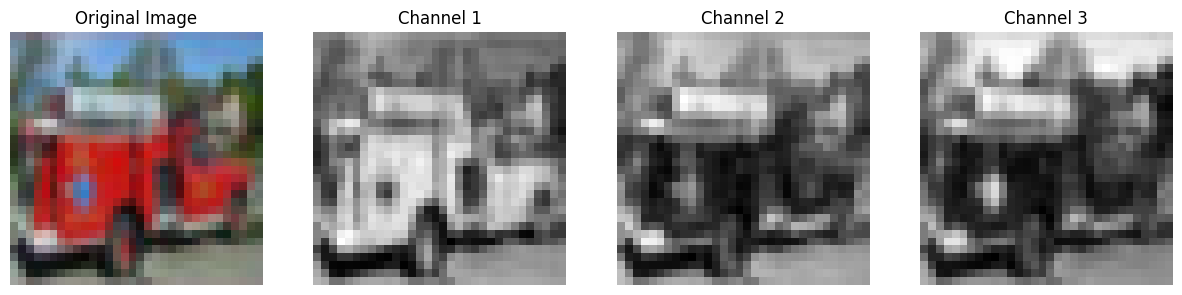

In [4]:
## YOUR CODE HERE

# Check a single image
img_check = X_train[0]
print(f"Dimensions of a single image: {img_check.shape}")

# Plot each channel of the image
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(img_check)
axs[0].set_title('Original Image')
axs[0].axis('off')
for i in range(3):
    axs[i+1].imshow(img_check[:, :, i], cmap='gray')
    axs[i+1].set_title(f'Channel {i+1}')
    axs[i+1].axis('off')
plt.show()

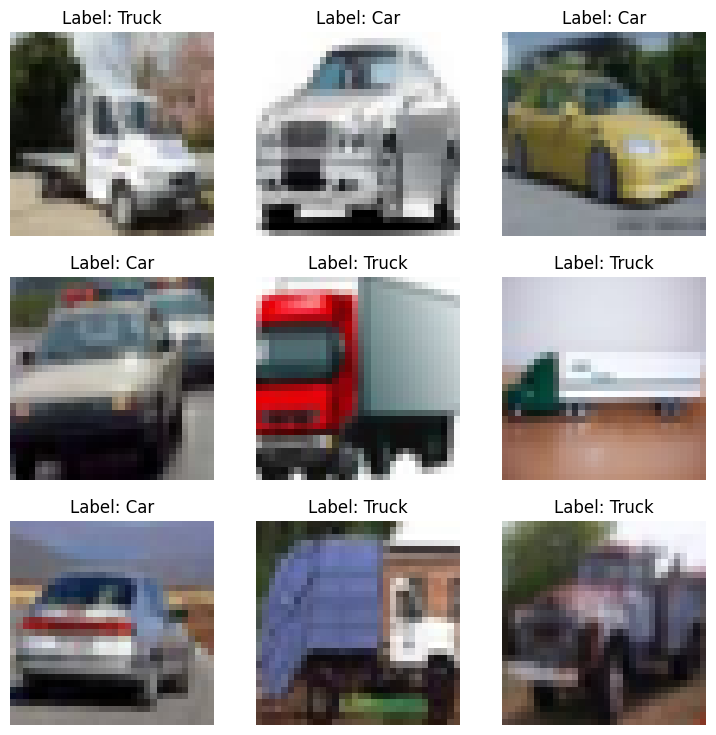

In [5]:
# Pick 9 images
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axs.flat):
    idx = np.random.randint(len(X_train))
    ax.imshow(X_train[idx])
    ax.set_title(f'Label: {"Car" if y_train[idx] == 0 else "Truck"}')
    ax.axis('off')
plt.show()

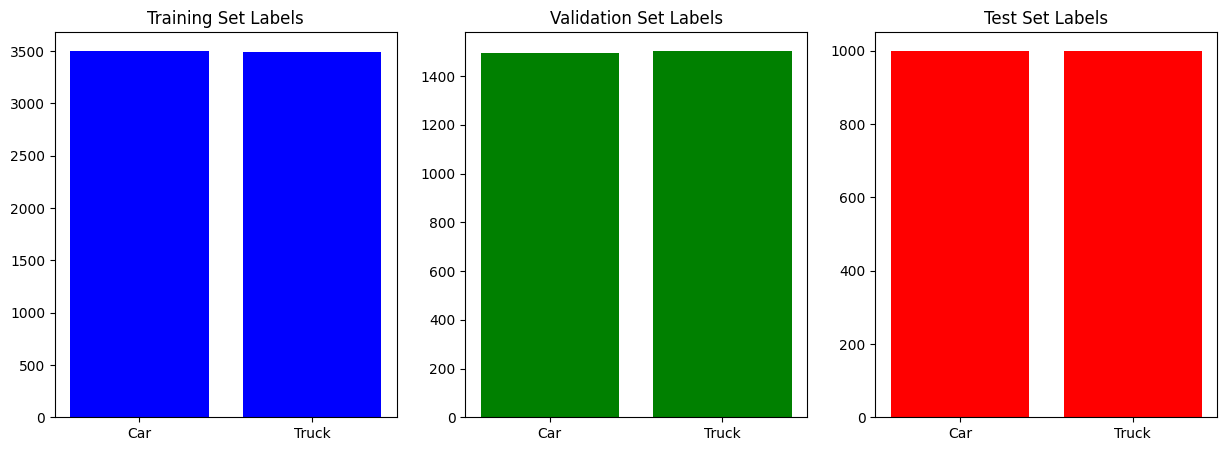

In [6]:
# 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(y_train, bins=np.arange(-0.5, 2.5, 1), rwidth=0.8, color='blue')
axs[0].set_title('Training Set Labels')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Car', 'Truck'])

axs[1].hist(y_val, bins=np.arange(-0.5, 2.5, 1), rwidth=0.8, color='green')
axs[1].set_title('Validation Set Labels')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Car', 'Truck'])

axs[2].hist(y_test, bins=np.arange(-0.5, 2.5, 1), rwidth=0.8, color='red')
axs[2].set_title('Test Set Labels')
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Car', 'Truck'])
plt.show()

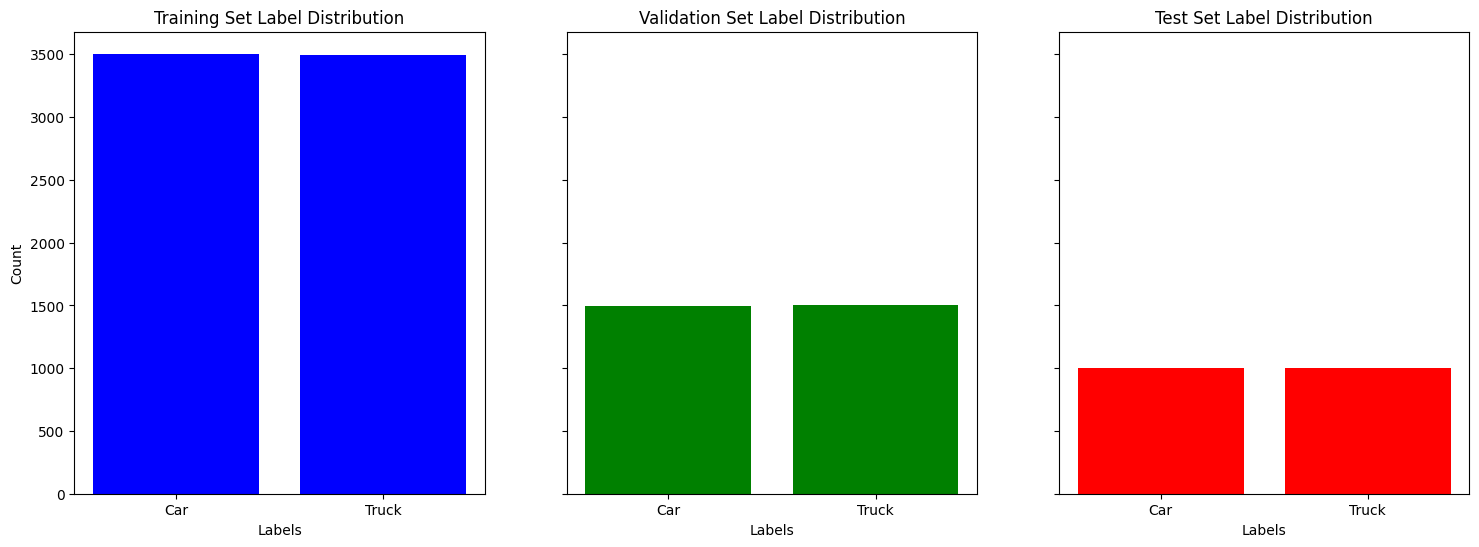

In [7]:
# Calculating label counts for each dataset
train_counts = np.bincount(y_train.flatten())
val_counts = np.bincount(y_val.flatten())
test_counts = np.bincount(y_test.flatten())

labels = ['Car', 'Truck']

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Training Set
axs[0].bar(labels, train_counts, color='blue')
axs[0].set_title('Training Set Label Distribution')
axs[0].set_xlabel('Labels')
axs[0].set_ylabel('Count')

# Plot for Validation Set
axs[1].bar(labels, val_counts, color='green')
axs[1].set_title('Validation Set Label Distribution')
axs[1].set_xlabel('Labels')

# Plot for Test Set
axs[2].bar(labels, test_counts, color='red')
axs[2].set_title('Test Set Label Distribution')
axs[2].set_xlabel('Labels')

plt.show()

### 1.2 Preprocessing
 
- Rescale the images data, so that the values lie between a range of 0 and 1. 
- Hint: A simple way to do this is to divide by 255.0

In [ ]:
# Standardization

# mean_pixel = np.mean(X_train, axis=0)
# std_pixel = np.std(X_train, axis=0) + 0.000000001
# X_train = (X_train - mean_pixel)/std_pixel
# X_test = (X_test - mean_pixel)/std_pixel

In [8]:
## YOUR CODE HERE

# Rescaling the images data
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### 1.3 Feedforward Neural Network

Reshape your data so that each image is flattened into a 1d array, and each of the train, test and validation sets are 2d arrays. 

Essentially, your data should be an array of length N, where N is the number of observations (images) in the train / test / validation sets. Each element in the array is a flattened image, of length 3072 (32 X 32 X3)     


In [11]:
## YOUR CODE HERE
# Reshape train data

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [13]:
# Check the shape
print("Shape of flattened training data:", X_train_flat.shape)
print("Shape of flattened validation data:", X_val_flat.shape)
print("Shape of flattened test data:", X_test_flat.shape)

Shape of flattened training data: (7000, 3072)
Shape of flattened validation data: (3000, 3072)
Shape of flattened test data: (2000, 3072)



### 1.3.1 Build a neural network with the following parameters

  - Architecture
     - Input dimensions: 3072 
     - 1 hidden layer: 64 nodes, Relu activation
     - Output layer: 1 node, Sigmoid activation
 - Compile the network:
     - Optimizer: Adam
     - Epochs: 30
     - Batch size: 32
     - Metrics: Accuracy
     - Remember to include the validation data in the compilation step. 
  - Outputs:
      - Plot the training and validation accuracy by epoch (See the example plot below). Do you see any evidence of overfitting in your plot?
      - Report the accuracy, Precision and Recall on the test set
      
**Example plot**

![ffn_performance](images/example_plot_ffn.png)

In [48]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1, l2

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [15]:
## YOUR CODE HERE

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=3072, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_flat, y_train,
                    validation_data=(X_val_flat, y_val),
                    epochs=30,
                    batch_size=32,
                    verbose=2)

/srv/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
219/219 - 2s - 7ms/step - accuracy: 0.6493 - loss: 0.6382 - val_accuracy: 0.6500 - val_loss: 0.6445
Epoch 2/30
219/219 - 1s - 3ms/step - accuracy: 0.6651 - loss: 0.6110 - val_accuracy: 0.6813 - val_loss: 0.5901
Epoch 3/30
219/219 - 1s - 3ms/step - accuracy: 0.6990 - loss: 0.5793 - val_accuracy: 0.6303 - val_loss: 0.6457
Epoch 4/30
219/219 - 1s - 3ms/step - accuracy: 0.7070 - loss: 0.5637 - val_accuracy: 0.6917 - val_loss: 0.5845
Epoch 5/30
219/219 - 1s - 3ms/step - accuracy: 0.7157 - loss: 0.5530 - val_accuracy: 0.7090 - val_loss: 0.5685
Epoch 6/30
219/219 - 1s - 3ms/step - accuracy: 0.7193 - loss: 0.5451 - val_accuracy: 0.6597 - val_loss: 0.6161
Epoch 7/30
219/219 - 1s - 3ms/step - accuracy: 0.7329 - loss: 0.5378 - val_accuracy: 0.6863 - val_loss: 0.5965
Epoch 8/30
219/219 - 1s - 3ms/step - accuracy: 0.7371 - loss: 0.5197 - val_accuracy: 0.7167 - val_loss: 0.5558
Epoch 9/30
219/219 - 1s - 3ms/step - accuracy: 0.7399 - loss: 0.5197 - val_accuracy: 0.7330 - val_loss: 0.5425
E

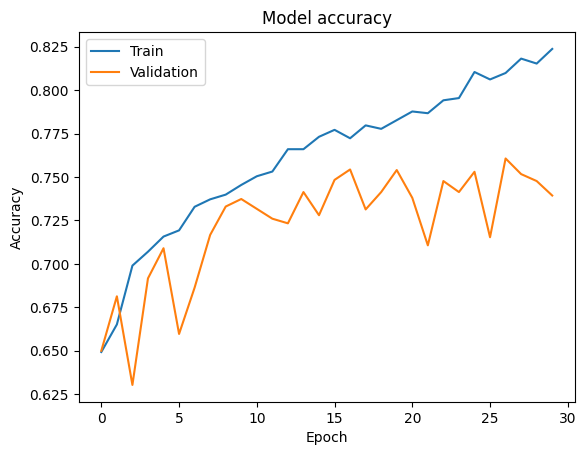

In [16]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test, verbose=0)

# Predictions to calculate precision and recall
y_pred = (model.predict(X_test_flat) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [18]:
# Calculate precision and recall
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test precision: {test_precision:.4f}")
print(f"Test recall: {test_recall:.4f}")

Test Accuracy: 0.7340
Test Precision: 0.7940
Test Recall: 0.6320


### 1.3.2 Tuning / Improving Performance

Now, go ahead and tune this network, or write up your own from scratch. The goal should be to exceed 75% overall classification accuracy on the test set. We don't expect you to implement cross-validation or any formal hyperparameter optimization techniques. Rather, the goal is to arrive at a model architecture that's acceptable to you via trial and error.  

Remember that you have a number of hyperparameters to work with, including
  - the number / dimension of hidden layers
  - choice of activation functions, 
  - type regularization, 
  - optimization techniques 
  
Note that you shouldn't need to train your model for more than 30 epochs.
  
The notebooks from Labs 9 and 10 are also a good starting point.
  
 
**Outputs:**
- In 2-3 sentences, briefly explain the various choices/ decisions you made in building your model architecture. 
- Report the classification accuracy on the test set, along with the precision and recall for each class.
- What do you notice about the precision and recall values, as well as the overall classification accuracy, in comparison to your outputs from 2.3.1?

In [35]:
## YOUR CODE HERE

# Tune the model
model_tuned = Sequential()
model_tuned.add(Dense(128, input_dim=3072, activation='relu'))
model_tuned.add(Dropout(0.2))
model_tuned.add(Dense(64, activation='relu'))
model_tuned.add(Dropout(0.2))
model_tuned.add(Dense(1, activation='sigmoid'))

# Compile model
model_tuned.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Train model
history_tuned = model_tuned.fit(X_train_flat, y_train,
                                validation_data=(X_val_flat, y_val),
                                epochs=30,
                                batch_size=64,
                                verbose=2)

Epoch 1/30


/srv/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 - 2s - 14ms/step - accuracy: 0.6117 - loss: 0.6552 - val_accuracy: 0.6470 - val_loss: 0.6260
Epoch 2/30
110/110 - 0s - 4ms/step - accuracy: 0.6489 - loss: 0.6268 - val_accuracy: 0.6573 - val_loss: 0.6200
Epoch 3/30
110/110 - 0s - 4ms/step - accuracy: 0.6643 - loss: 0.6120 - val_accuracy: 0.6493 - val_loss: 0.6216
Epoch 4/30
110/110 - 0s - 4ms/step - accuracy: 0.6737 - loss: 0.5974 - val_accuracy: 0.6810 - val_loss: 0.5949
Epoch 5/30
110/110 - 0s - 4ms/step - accuracy: 0.6921 - loss: 0.5863 - val_accuracy: 0.6870 - val_loss: 0.5897
Epoch 6/30
110/110 - 0s - 4ms/step - accuracy: 0.6934 - loss: 0.5774 - val_accuracy: 0.6917 - val_loss: 0.5845
Epoch 7/30
110/110 - 0s - 4ms/step - accuracy: 0.7017 - loss: 0.5684 - val_accuracy: 0.6987 - val_loss: 0.5766
Epoch 8/30
110/110 - 0s - 4ms/step - accuracy: 0.7151 - loss: 0.5602 - val_accuracy: 0.7040 - val_loss: 0.5679
Epoch 9/30
110/110 - 0s - 4ms/step - accuracy: 0.7264 - loss: 0.5472 - val_accuracy: 0.7100 - val_loss: 0.5613
Epoch 10/30

In [36]:
# Evaluate the model on the test data
test_loss_tuned, test_accuracy_tuned = model_tuned.evaluate(X_test_flat, y_test, verbose=0)

# Predictions to calculate precision and recall
y_pred_tuned = (model_tuned.predict(X_test_flat) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [37]:
# Calculate Precision and Recall
test_precision_tuned = precision_score(y_test, y_pred_tuned)
test_recall_tuned = recall_score(y_test, y_pred_tuned)

# Print the metrics
print(f"Test accuracy: {test_accuracy_tuned:.4f}")
print(f"Test precision: {test_precision_tuned:.4f}")
print(f"Test recall: {test_recall_tuned:.4f}")

Test accuracy: 0.7500
Test precision: 0.7422
Test recall: 0.7660


The model was improved by adding an additional hidden layer to increase the model's capacity, which helps in capturing more complex patterns in the data. Adding Dropout is to prevent overfitting, which was observed in the initial model. The learning rate was slightly decreased to allow for more subtle updates during training, which can sometimes result in better convergence on the validation set. Batch size was increased to 64 to stabilize the gradient descent process.

### 1.4. Convolutional Neural Network


### 1.4.1 Build a CNN with the following parameters

  - Architecture
     - Input dimensions: (32, 32,  3) 
     - 1 Conv2D Layer: 
         - Number of filters: 20. 
         - Filter Dimension: 3 X 3. 
         - Activation: Relu
     - Flatten
     - Output layer: 1 node, Sigmoid activation
 - Compile the network:
     - Optimizer: Adam
     - Epochs: 20
     - Metrics: Accuracy
     - Remember to include the validation data in the compilation step. 
  - Outputs:
      - Plot the training and validation accuracy by epoch.
      - Report the accuracy, Precision and Recall on the test set

In [38]:
## YOUR CODE HERE

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(20, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the CNN
cnn_model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the CNN
history_cnn = cnn_model.fit(X_train, y_train, # X_train is not flattened
                            validation_data=(X_val, y_val), # X_val is not flattened
                            epochs=20,
                            batch_size=32,
                            verbose=2)

Epoch 1/20


/srv/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


219/219 - 2s - 8ms/step - accuracy: 0.6753 - loss: 0.6025 - val_accuracy: 0.7243 - val_loss: 0.5450
Epoch 2/20
219/219 - 1s - 4ms/step - accuracy: 0.7623 - loss: 0.5063 - val_accuracy: 0.7733 - val_loss: 0.4760
Epoch 3/20
219/219 - 1s - 4ms/step - accuracy: 0.8001 - loss: 0.4407 - val_accuracy: 0.7970 - val_loss: 0.4535
Epoch 4/20
219/219 - 1s - 4ms/step - accuracy: 0.8234 - loss: 0.4031 - val_accuracy: 0.7943 - val_loss: 0.4459
Epoch 5/20
219/219 - 1s - 4ms/step - accuracy: 0.8391 - loss: 0.3795 - val_accuracy: 0.8113 - val_loss: 0.4208
Epoch 6/20
219/219 - 1s - 4ms/step - accuracy: 0.8413 - loss: 0.3683 - val_accuracy: 0.8050 - val_loss: 0.4347
Epoch 7/20
219/219 - 1s - 4ms/step - accuracy: 0.8569 - loss: 0.3450 - val_accuracy: 0.8063 - val_loss: 0.4217
Epoch 8/20
219/219 - 1s - 4ms/step - accuracy: 0.8599 - loss: 0.3362 - val_accuracy: 0.8093 - val_loss: 0.4210
Epoch 9/20
219/219 - 1s - 4ms/step - accuracy: 0.8641 - loss: 0.3215 - val_accuracy: 0.8187 - val_loss: 0.4150
Epoch 10/20


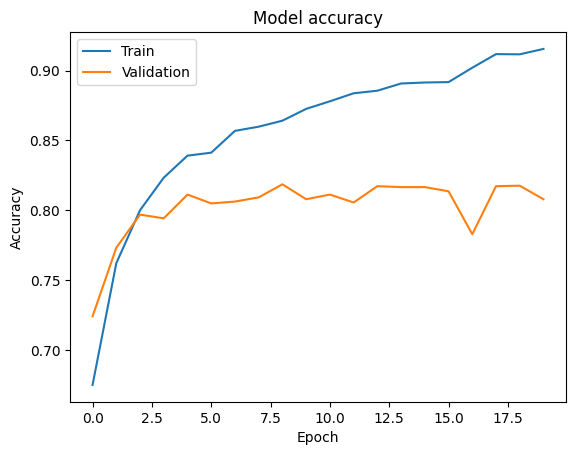

In [39]:
# Plot training & validation accuracy
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
# Evaluate the CNN on the test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)

# Predictions to calculate precision and recall
y_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
# Calculate precision and recall
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

# Print the metrics
print(f"CNN test accuracy: {test_accuracy:.4f}")
print(f"CNN test precision: {test_precision:.4f}")
print(f"CNN test recall: {test_recall:.4f}")

CNN test accuracy: 0.7890
CNN test precision: 0.8197
CNN test recall: 0.7410


### 1.4.2 Tuning / Improving Performance

Now, go ahead and tune this network, or write up your own from scratch. The goal should be to exceed 85% overall classification accuracy on the test set. We don't expect you to implement cross-validation or any formal hyperparameter optimization techniques. Rather, the goal is to arrive at a model architecture that's acceptable to you via trial and error. 

Note that you shouldn't need to train your model for more than 30 epochs. 

Remember that you have a number of hyperparameters to work with, including
  - the number / dimension of hidden layers
  - choice of activation functions, 
  - type regularization, 
  - optimization techniques
  - and other relevant aspects(adding data augmentation etc.)
  
The notebooks from Labs 9 and 10 are a good starting point in terms of putting together a more complex architecture. 

<span style="color:red">Warning!</span> If you intend to attempt **Extra Credit 1 and 2** (below), ensure that you carefully name / store the trained model you build in this step. It's fine to keep trained model in memory, or to save the weights to disk.

  
 
**Outputs:**
 - Report the classification accuracy on the test set, along with the precision and recall for each class. 
 - Briefly explain your model architecture / choices you made in tuning your CNN (No more than 3 - 4 sentences)
 - What do you notice about the precision and recall values, as well as the overall classification accuracy, in comparison to the feed forward neural networks from part 2.3, and your baseline in 2.4.1?

In [43]:
## YOUR CODE HERE

# Tune the CNN
cnn_model_tuned = Sequential()
cnn_model_tuned.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model_tuned.add(BatchNormalization())
cnn_model_tuned.add(MaxPooling2D((2, 2)))
cnn_model_tuned.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_tuned.add(BatchNormalization())
cnn_model_tuned.add(MaxPooling2D((2, 2)))
cnn_model_tuned.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_tuned.add(BatchNormalization())
cnn_model_tuned.add(MaxPooling2D((2, 2)))
cnn_model_tuned.add(Flatten())
cnn_model_tuned.add(Dense(128, activation='relu'))
cnn_model_tuned.add(Dropout(0.5))
cnn_model_tuned.add(Dense(1, activation='sigmoid'))

# Compile the CNN
cnn_model_tuned.compile(optimizer=Adam(),
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

# Train the CNN
history_cnn_tuned = cnn_model_tuned.fit(X_train, y_train,
                                        validation_data=(X_val, y_val),
                                        epochs=30,
                                        batch_size=64,
                                        verbose=2)

/srv/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30
110/110 - 6s - 55ms/step - accuracy: 0.7326 - loss: 0.5820 - val_accuracy: 0.6390 - val_loss: 0.6372
Epoch 2/30
110/110 - 3s - 30ms/step - accuracy: 0.8429 - loss: 0.3692 - val_accuracy: 0.5860 - val_loss: 0.6975
Epoch 3/30
110/110 - 3s - 31ms/step - accuracy: 0.8893 - loss: 0.2840 - val_accuracy: 0.7877 - val_loss: 0.4587
Epoch 4/30
110/110 - 3s - 30ms/step - accuracy: 0.9006 - loss: 0.2392 - val_accuracy: 0.8247 - val_loss: 0.4282
Epoch 5/30
110/110 - 3s - 29ms/step - accuracy: 0.9249 - loss: 0.1900 - val_accuracy: 0.8610 - val_loss: 0.3346
Epoch 6/30
110/110 - 3s - 30ms/step - accuracy: 0.9433 - loss: 0.1456 - val_accuracy: 0.7700 - val_loss: 0.5753
Epoch 7/30
110/110 - 3s - 29ms/step - accuracy: 0.9536 - loss: 0.1177 - val_accuracy: 0.6423 - val_loss: 1.6111
Epoch 8/30
110/110 - 3s - 29ms/step - accuracy: 0.9647 - loss: 0.0903 - val_accuracy: 0.8437 - val_loss: 0.5757
Epoch 9/30
110/110 - 3s - 30ms/step - accuracy: 0.9736 - loss: 0.0693 - val_accuracy: 0.8067 - val_loss:

In [44]:
# Evaluate the CNN
test_loss_tuned, test_accuracy_tuned = cnn_model_tuned.evaluate(X_test, y_test, verbose=0)
y_pred_tuned = (cnn_model_tuned.predict(X_test) > 0.5).astype("int32")
test_precision_tuned = precision_score(y_test, y_pred_tuned)
test_recall_tuned = recall_score(y_test, y_pred_tuned)

# Print the metrics
print(f"Improved CNN test accuracy: {test_accuracy_tuned:.4f}")
print(f"Improved CNN Test precision: {test_precision_tuned:.4f}")
print(f"Improved CNN test recall: {test_recall_tuned:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Improved CNN test accuracy: 0.8895
Improved CNN Test precision: 0.9166
Improved CNN test recall: 0.8570


The tuned CNN adds additional convolutional layers with increasing numbers of filters, which helps in learning more complex features of the images. Batch normalization is used to accelerate training by reducing internal covariate shift. Max pooling layers reduce the spatial dimensions of the output volumes, which helps with reducing the number of parameters and computational load. Dropout is added to prevent overfitting and a final fully connected layer is used to perform classification.

### 1.5. Convolutional Filters

Now, let's attempt to better understand what our CNN is doing under the hood. We'll start by visually examining our convolutional filters. 

- We'll focus on the first convolutional layer in your CNN. 
    - Use the [get_weights()](https://keras.io/api/layers/base_layer/#getweights-method) method to obtain the filters.
    - Plot the first 5 filters, for each channel (your plot will be a grid of 5 X 3). 
    - Your plot will resemble the one below (the exact nature of the visual patterns will depend on your model architecture etc.)
    - What do you observe about the filters you visualize? 
    
**Example output**
 ![Example](images/filters.png)

In [46]:
## YOUR CODE HERE

# Get the weights of the first convolutional layer
filters, biases = cnn_model_tuned.layers[0].get_weights()

# Normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

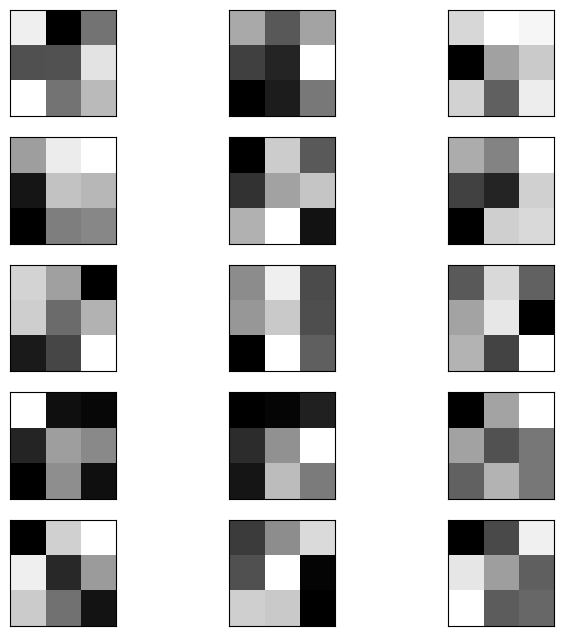

In [47]:
# Plot the first 5 filters
n_filters, ix = 5, 1
plt.figure(figsize=(8, 8))

for i in range(n_filters):
    # Get the filter
    f = filters[:, :, :, i]
    
    # Plot each channel separately
    for j in range(3):
        # Specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1

plt.show()

The visualization will look like small 3*3 patterns that each filter is detecting the input images. Filters are like feature detectors from the input images. Early filters in a network may detect simple features. They change depending on the random initialization and the training data.

### 1.6. Feature Maps

A feature map, or an activation map allows us to examine the result of applying the filters to a given input. The broad intuition is that feature maps closer to the input image detect fine-grained detail, whereas feature maps closer to the output of the model capture more generic aspects. 

Your task is to create and visualize a feature map (i.e the outputs) from the first convolutional layer in your trained CNN. 

In order to do this, proceed as follows:
- Identify a nice image from your training data -- ideally, something that has some distinguishing properties to the naked eye.
- Pass this image through your trained CNN from **2.4.2**, and store the output from the first convolutional layer -- this is your feature map! Note that there are multiple ways to do this; the simplest is to create a copy of your trained CNN, and remove the later layers. The Models function can help you do this. 
- Note that the size of the feature map depends on how many filters you have in the layer. 
- Outputs:
    - plot 1) The raw image from the training data, and 2) the feature map. An example is shown below:
    - what do you observe about the feature maps?
    
**Raw Image**
![Plane](images/plane1.png)

**Feature Map**
![Plane-features](images/plane_feature_map.png)

In [57]:
## YOUR CODE HERE

# First, store the inputs / outputs from the first convolutional / hidden layer in your network.
# Hint: The keras documentation will be helpful (https://keras.io/guides/functional_api/)
# Note that you can create a model using another model/ layer's inputs / outputs:
# model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

# Then, pass your chosen image through(i.e predict)


## Plot the original image, and the feature maps

# Assuming 'cnn_model_improved' is your trained model and has a Conv2D layer as the first layer.
conv_layer = cnn_model_tuned.layers[0]

# Create a model that will return the output of the Conv2D layer
model = Model(inputs=cnn_model_tuned.inputs, outputs=conv_layer.output)

# Select and rescale a sample image
sample_img = X_train[0]  
sample_img = sample_img.astype('float32') / 255.0
sample_img = np.expand_dims(sample_img, axis=0)

# Get the feature maps
feature_map = model.predict(sample_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


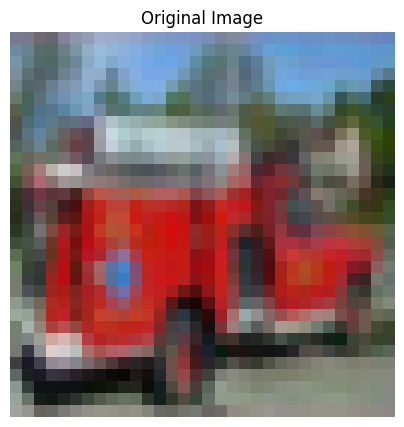

In [64]:
# Plot the original image and the feature maps
sample_image = X_train[0]

plt.figure(figsize=(5, 5))
plt.imshow(sample_image)
plt.title('Original Image')
plt.axis('off')
plt.show()

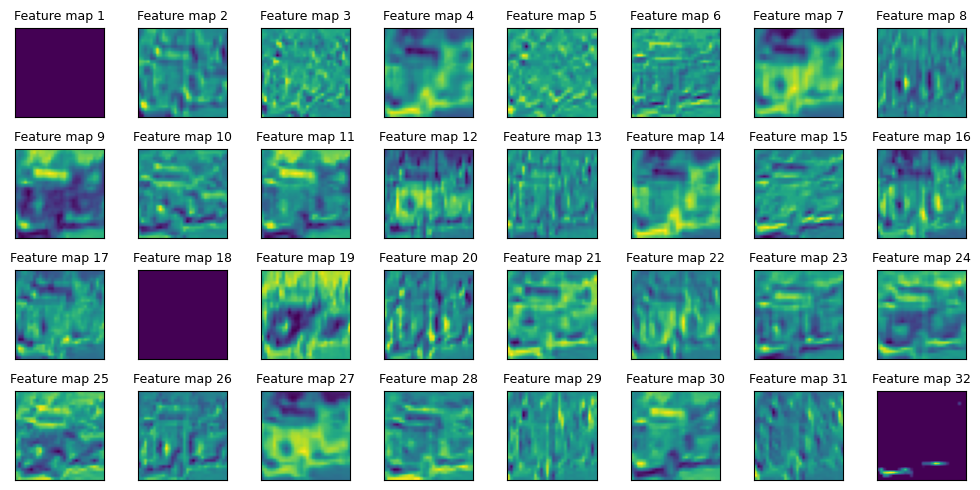

In [68]:
# Number of feature maps
n_features = feature_map.shape[-1]

# Set up subplots based on the number of filters
n_rows = 4
n_cols = n_features // n_rows + (n_features % n_rows > 0)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 5))

# Plot each feature map
for i in range(n_rows * n_cols):
    ax = axes[i // n_cols, i % n_cols]
    ax.set_xticks([])
    ax.set_yticks([])
    # Only plot the valid feature maps
    if i < n_features:
        ax.imshow(feature_map[0, :, :, i], cmap='viridis')
        ax.set_title(f'Feature map {i + 1}', fontsize=9)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()